The cell below loads in data from Google Play, including application ratings, installs, names, prices, etc. We also import a few libraries that will be useful for data manipulation and visualization (matplotlib, numpy, pandas).
We have about 11,000 observations total.
Let's take a look at the first twenty rows of data.

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
get_ipython().magic('matplotlib inline')

gp_data = pd.read_csv("/Users/neil/Desktop/googleplaystore.csv", encoding="latin1")
gp_data[:20]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


It appears that some of these columns need some reworking; that '+' and ',' in the installs column, and the '$' in the price column will be bothersome for analysis.
In this next cell we'll get rid of those, the version columns that we aren't interested in, and drop an observation whose values are in the wrong columns.

In [261]:
#delete unnecessary columns to improve readability
del gp_data['Android Ver']
del gp_data['Current Ver']

#dropping characters from numeric strings to get numbers usable for analysis
gp_data['Installs'] = gp_data['Installs'].str.strip('+')
gp_data['Installs'] = gp_data['Installs'].str.replace(',', '')
gp_data['Price'] = gp_data['Price'].str.strip('$')

#drop problem observation, where the values for variables are in the wrong columns
gp_data.drop(gp_data.index[10472], inplace = True)
#convert to a number
gp_data[['Reviews','Installs']] = gp_data[['Reviews','Installs']].apply(pd.to_numeric)
gp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null object
Installs          10840 non-null int64
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 1016.2+ KB


Let's check if we have any missing values in our data.

In [262]:
gp_data.columns[gp_data.isnull().any()]

def num_missing(x):
  return sum(x.isnull())
print ("Missing values per column:")
gp_data.apply(num_missing, axis=0)

Missing values per column:


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

It appears that most of our missing values are in the ratings column. Let's look at the observations with missing values to see if we can find a trend.

In [263]:
#check for randomness in missing values
gp_data_missing = gp_data[gp_data.isnull().any(axis=1)]
gp_data_missing[:100]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,100000,Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018"
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,100000,Free,0,Everyone 10+,Beauty,"September 20, 2017"
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,50000,Free,0,Everyone,Beauty,"July 23, 2018"
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,100000,Free,0,Teen,Beauty,"July 17, 2018"
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,10000,Free,0,Mature 17+,Beauty,"August 8, 2017"
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,10000,Free,0,Everyone 10+,Beauty,"December 11, 2017"
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,10000,Free,0,Mature 17+,Beauty,"January 24, 2018"
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,10000,Free,0,Everyone,Books & Reference,"July 13, 2018"
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,50000,Free,0,Everyone,Books & Reference,"June 15, 2018"
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,100000,Free,0,Everyone,Books & Reference,"August 7, 2015"


There doesn't seem to be a trend in which observations have missing values, so we can safely drop them.

In [264]:
#data appear to be missing at random;
gp_data.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,"March 26, 2017"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0,Everyone,Art & Design,"April 26, 2018"
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0,Everyone,Art & Design,"June 14, 2018"
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,"September 20, 2017"
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018"


In case we want to run analysis on free apps versus paid apps, we can convert these into categories.

In [265]:
pd.get_dummies(gp_data['Type'])

,Free,Paid
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


Now we will look for outliers in our data, which may skew our analysis unless we deal with them.

In [266]:
q_df = gp_data.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,Rating,Reviews,Installs
0.25,4.00,38.00,1000.0
0.75,4.50,54775.50,5000000.0
iqr,0.50,54737.50,4999000.0
whisker_length,0.75,82106.25,7498500.0
max_whisker,5.25,136881.75,12498500.0
min_whisker,3.25,-82068.25,-7497500.0


In [267]:
max_outlier_rating = [rating for rating in gp_data['Rating'] if rating > q_df['Rating'].loc['max_whisker']]
len(max_outlier_rating)

0

In [268]:
max_outlier_rating[:1]
#our single outlier for rating is definitely beyond the five star limit, so we'll drop it

[]

It looks like we only have one outlier in our Ratings column, which is a whopping 19 stars on a five star scale. We'll drop it.

In [269]:
gp_data = gp_data[gp_data.Rating <= 5.0]

In [270]:
gp_data.describe()

,Rating,Reviews,Installs
count,9366.000000,9.366000e+03,9.366000e+03
mean,4.191757,5.140498e+05,1.789744e+07
std,0.515219,3.144042e+06,9.123822e+07
min,1.000000,1.000000e+00,1.000000e+00
25%,4.000000,1.862500e+02,1.000000e+04
50%,4.300000,5.930500e+03,5.000000e+05
75%,4.500000,8.153275e+04,5.000000e+06
max,5.000000,7.815831e+07,1.000000e+09


Now we'll move into the analysis section. We'll take a look at how often certain install values show up, which app categories get more installs, and which categories have the highest average ratings.

In [271]:
from collections import Counter
categories = gp_data["Category"].tolist()
installs = gp_data["Installs"].tolist()
Counter(installs).most_common(10)

[(1000000, 1577),
 (10000000, 1252),
 (100000, 1150),
 (10000, 1010),
 (5000000, 752),
 (1000, 713),
 (500000, 538),
 (50000, 467),
 (5000, 432),
 (100000000, 409)]

In [272]:
gp_data.corr()

,Rating,Reviews,Installs
Rating,1.000000,0.068141,0.051355
Reviews,0.068141,1.000000,0.641612
Installs,0.051355,0.641612,1.000000


The correlations here are fairly loose.

In [273]:
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
sns.set(style='ticks', palette='Set2')

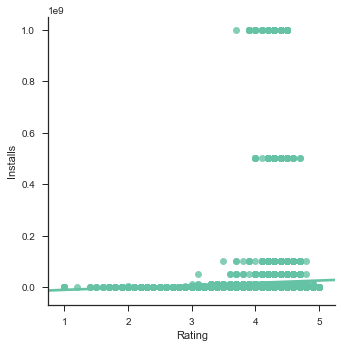

In [274]:
sns.lmplot(x="Rating", y="Installs", data=gp_data)
#describe the installs variable

This above plot is odd, since the Install column only tells us the minimum value of installs that an app attained. It does tell us that to reach the higher install ranges 
(50,000 to 1,000,000) it helps to have a higher rated app. There's some obvious reverse causality in the works here.

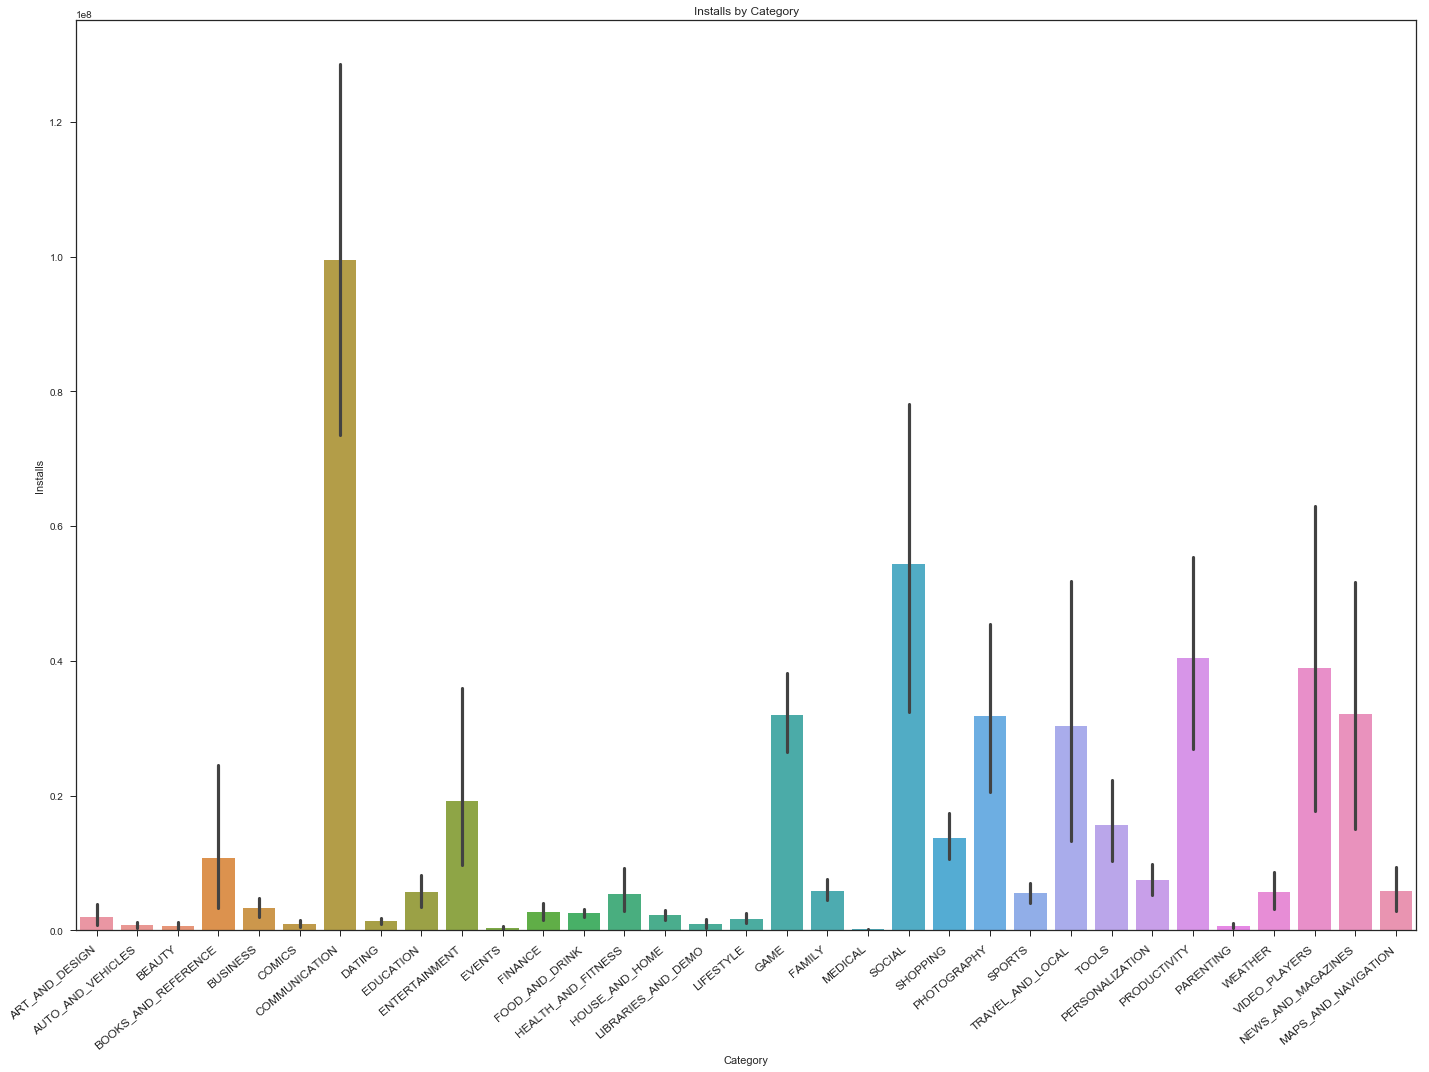

In [371]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(gp_data.Category, gp_data.Installs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
plt.title('Installs by Category')
plt.tight_layout()
plt.show()

This graph seems more useful. Every category is represented with its corresponding number of installs. It appears that the top five categories are Communication (by far the highest), Social, Video Players, Games, and Productivity. If we were interested in creating apps with a lot of installs, perhaps for advertising purposes, communication apps would be our best bet.

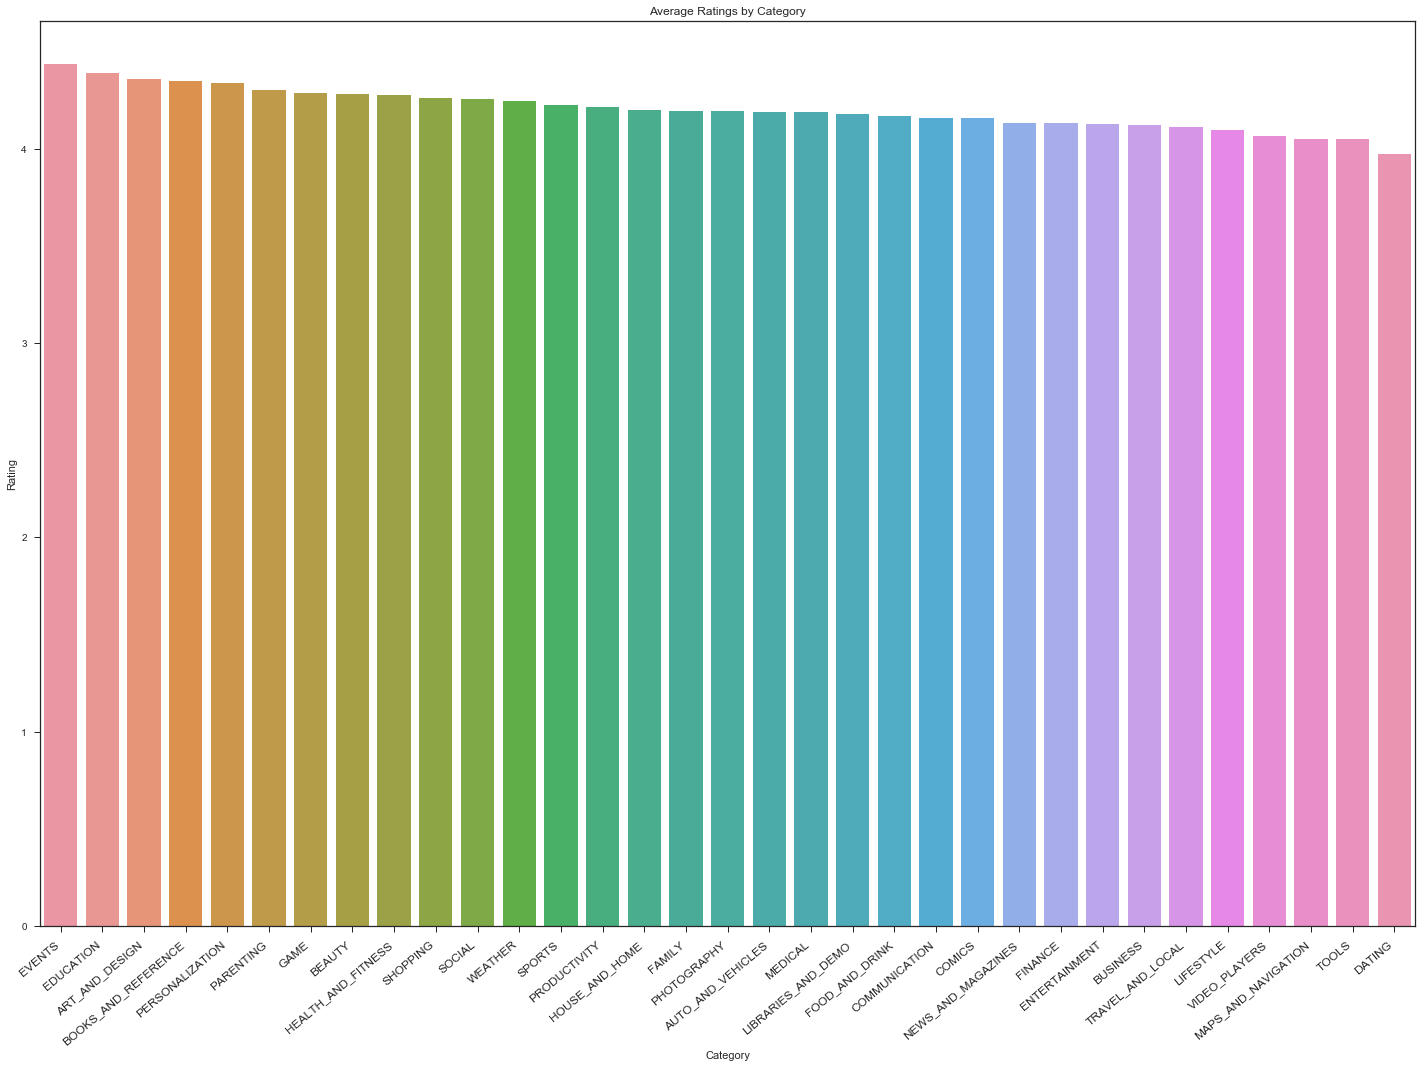

In [276]:
category_list = list(gp_data.Category.unique())
ratings = []

#the below code was lifted from a user on kaggle, but I included it because 
#I thought the analysis was useful and the graph was neat
for category in category_list:
    x = gp_data[gp_data.Category == category]
    rating_rate = x.Rating.sum()/len(x)
    ratings.append(rating_rate)
data = pd.DataFrame({'Category':category_list, 'Rating':ratings})
new_index = (data['Rating'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.subplots(figsize=(20,15))
ax = sns.barplot(x=sorted_data.Category, y=sorted_data.Rating)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
plt.title('Average Ratings by Category')
plt.tight_layout()
plt.show()

This graph tells us which apps are more likely to be highly rated. The differences between one app and the next don't appear to be large, but between apps on the lower end and the higher end it can be significant. Especially if we consider ratings to be correlated with installs. It appears that, on average, education apps are the most highly rated. 

This begins the next section of the homework; reading in an .xls file of school breakfasts served (in millions) on a federal level. 

In [277]:
bf_data = pd.read_excel("/Users/neil/Desktop/sbsummar.xls", encoding="utf-8-sig")
bf_data

,Fiscal Years,Free,Red. Price,Paid,Total,Meals Served,Free/ RP of Total Meals
0,1969,--,--,--,0.22,39.70,71.0
1,1970,--,--,--,0.45,71.80,71.5
2,1971,0.6,2],0.2,0.80,125.50,76.3
3,1972,0.81,2],0.23,1.04,169.30,78.5
4,1973,0.99,2],0.2,1.19,194.10,83.4
5,1974,1.14,2],0.24,1.37,226.70,82.8
6,1975,1.45,0.04,0.33,1.82,294.70,82.1
7,1976,1.76,0.06,0.37,2.20,353.60,84.2
8,1977,2.02,0.11,0.36,2.49,434.30,85.7
9,1978,2.23,0.16,0.42,2.80,478.80,85.3


The first few columns (Free, Red. Price, Paid, Total, Meals Served) are in millions, and Free/Rp of Total Meals is a percentage of the total breakfasts served in public schools. We appear to be missing values in two observations, the years 1969 and 1970. That accounts for less than 5% of our data, so we can drop those observations without too much worry.

In [278]:
bf_data.drop(bf_data.index[0], inplace = True)
bf_data.drop(bf_data.index[0], inplace = True)

In [279]:
bf_data

,Fiscal Years,Free,Red. Price,Paid,Total,Meals Served,Free/ RP of Total Meals
2,1971,0.6,2],0.2,0.80,125.50,76.3
3,1972,0.81,2],0.23,1.04,169.30,78.5
4,1973,0.99,2],0.2,1.19,194.10,83.4
5,1974,1.14,2],0.24,1.37,226.70,82.8
6,1975,1.45,0.04,0.33,1.82,294.70,82.1
7,1976,1.76,0.06,0.37,2.20,353.60,84.2
8,1977,2.02,0.11,0.36,2.49,434.30,85.7
9,1978,2.23,0.16,0.42,2.80,478.80,85.3
10,1979,2.56,0.21,0.54,3.32,565.60,84.1
11,1980,2.79,0.25,0.56,3.60,619.90,85.2


Now that we've successfully dropped the problem observations, it looks like there's an issue with the next four observations in the Red. Price column: we need to get rid of the ']'. It also looks like, based on the values for Free and Paid for those observations, Red. Price should be zero for all of those. (Paid + Free + Red. Price = Total, and from Free + Paid we already have the value in Total, so we need to change the values of Red. Price to zero). 

In [280]:
bf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 2 to 48
Data columns (total 7 columns):
Fiscal Years                47 non-null int64
Free                        47 non-null object
Red. Price                  47 non-null object
Paid                        47 non-null object
Total                       47 non-null float64
Meals Served                47 non-null float64
Free/ RP of Total Meals     47 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ KB


It looks like we also need to correct the object types for Free, Red. Price, and Paid; they're currently strings, and we need them to be numeric.

In [281]:
bf_data['Red. Price '] = bf_data['Red. Price '].replace('2]', '0')
bf_data[['Free','Red. Price ', 'Paid']] = bf_data[['Free','Red. Price ', 'Paid']].apply(pd.to_numeric)

In [282]:
bf_data


,Fiscal Years,Free,Red. Price,Paid,Total,Meals Served,Free/ RP of Total Meals
2,1971,0.60,0.00,0.20,0.80,125.50,76.3
3,1972,0.81,0.00,0.23,1.04,169.30,78.5
4,1973,0.99,0.00,0.20,1.19,194.10,83.4
5,1974,1.14,0.00,0.24,1.37,226.70,82.8
6,1975,1.45,0.04,0.33,1.82,294.70,82.1
7,1976,1.76,0.06,0.37,2.20,353.60,84.2
8,1977,2.02,0.11,0.36,2.49,434.30,85.7
9,1978,2.23,0.16,0.42,2.80,478.80,85.3
10,1979,2.56,0.21,0.54,3.32,565.60,84.1
11,1980,2.79,0.25,0.56,3.60,619.90,85.2


Now with our data corrected in terms of types and missing values, now is a good time to check for outliers.

In [283]:
q_df = bf_data.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,Fiscal Years,Free,Red. Price,Paid,Total,Meals Served,Free/ RP of Total Meals
0.25,1982.5,2.875,0.160,0.4150,3.4350,592.0500,83.05
0.75,2005.5,6.895,0.850,1.7800,9.5600,1633.4750,86.85
iqr,23.0,4.020,0.690,1.3650,6.1250,1041.4250,3.80
whisker_length,34.5,6.030,1.035,2.0475,9.1875,1562.1375,5.70
max_whisker,2040.0,12.925,1.885,3.8275,18.7475,3195.6125,92.55
min_whisker,1948.0,-3.155,-0.875,-1.6325,-5.7525,-970.0875,77.35


In [284]:
max_outlier_free = [free for free in bf_data['Free'] if free > q_df['Free'].loc['max_whisker']]
max_outlier_red = [red for red in bf_data['Red. Price '] if red > q_df['Red. Price '].loc['max_whisker']]
max_outlier_paid = [paid for paid in bf_data['Paid'] if paid > q_df['Paid'].loc['max_whisker']]
max_outlier_meals = [meals for meals in bf_data['Meals Served'] if meals > q_df['Meals Served'].loc['max_whisker']]
max_outlier_total = [total for total in bf_data['Total '] if total > q_df['Total '].loc['max_whisker']]
max_outlier_percent = [percent for percent in bf_data['Free/ RP of Total Meals '] if percent > q_df['Free/ RP of Total Meals '].loc['max_whisker']]





In [285]:
max_outlier_free

[]

In [286]:
max_outlier_red

[]

In [287]:
max_outlier_paid

[]

In [288]:
max_outlier_meals

[]

In [289]:
max_outlier_total

[]

In [290]:
max_outlier_percent

[]

It looks like out data are free of outliers. Now that our code is cleaned, let's look at some summary stats and visualizations.

In [291]:
bf_data.describe()

,Fiscal Years,Free,Red. Price,Paid,Total,Meals Served,Free/ RP of Total Meals
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1994.000000,5.096809,0.470426,1.030638,6.598085,1120.032766,84.912766
std,13.711309,3.057311,0.366896,0.703900,4.086004,683.312806,2.913433
min,1971.000000,0.600000,0.000000,0.200000,0.800000,125.500000,76.300000
25%,1982.500000,2.875000,0.160000,0.415000,3.435000,592.050000,83.050000
50%,1994.000000,4.760000,0.320000,0.750000,5.830000,1001.520000,85.100000
75%,2005.500000,6.895000,0.850000,1.780000,9.560000,1633.475000,86.850000
max,2017.000000,11.600000,1.070000,2.230000,14.660000,2448.340000,90.300000


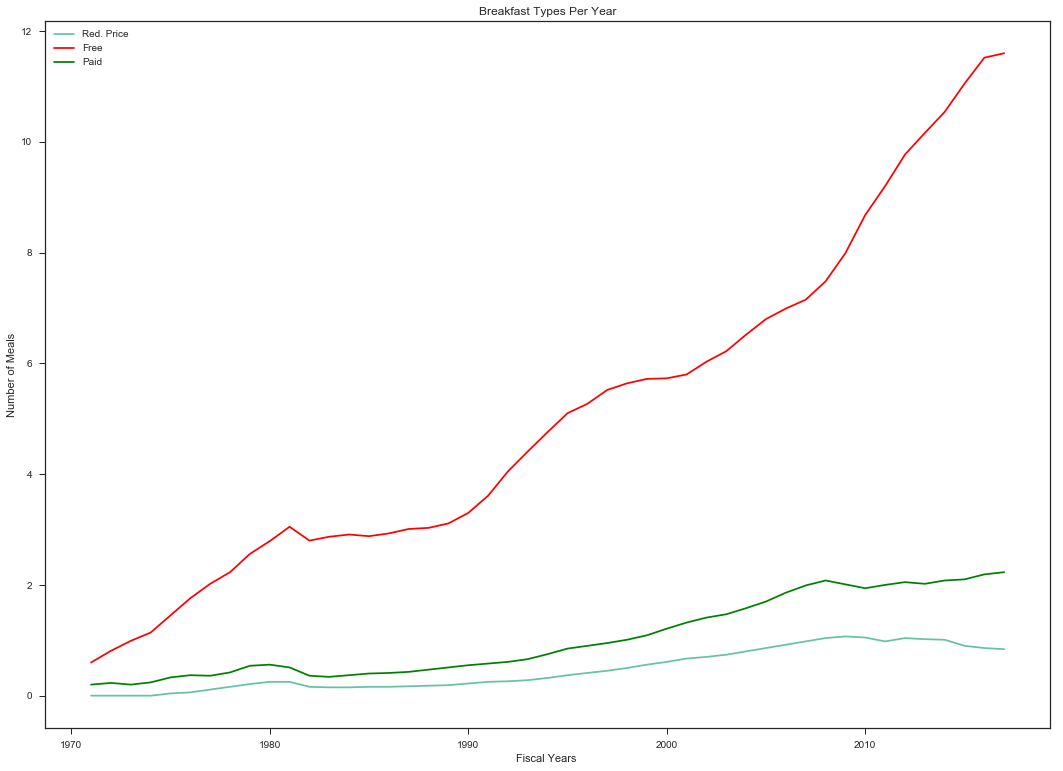

In [372]:
plt.subplots(figsize=(18,13))
ax = plt.gca()
ax.set_ylabel("Number of Meals")

bf_data.plot(kind='line',x='Fiscal Years ',y='Red. Price ',ax=ax)
bf_data.plot(kind='line',x='Fiscal Years ',y='Free', color='red', ax=ax)
bf_data.plot(kind='line',x='Fiscal Years ',y='Paid', color='green', ax=ax)
plt.title('Breakfast Types Per Year')
plt.show()

It appears that the number of free breakfasts is increasing much faster than paid or reduced price breakfasts. 

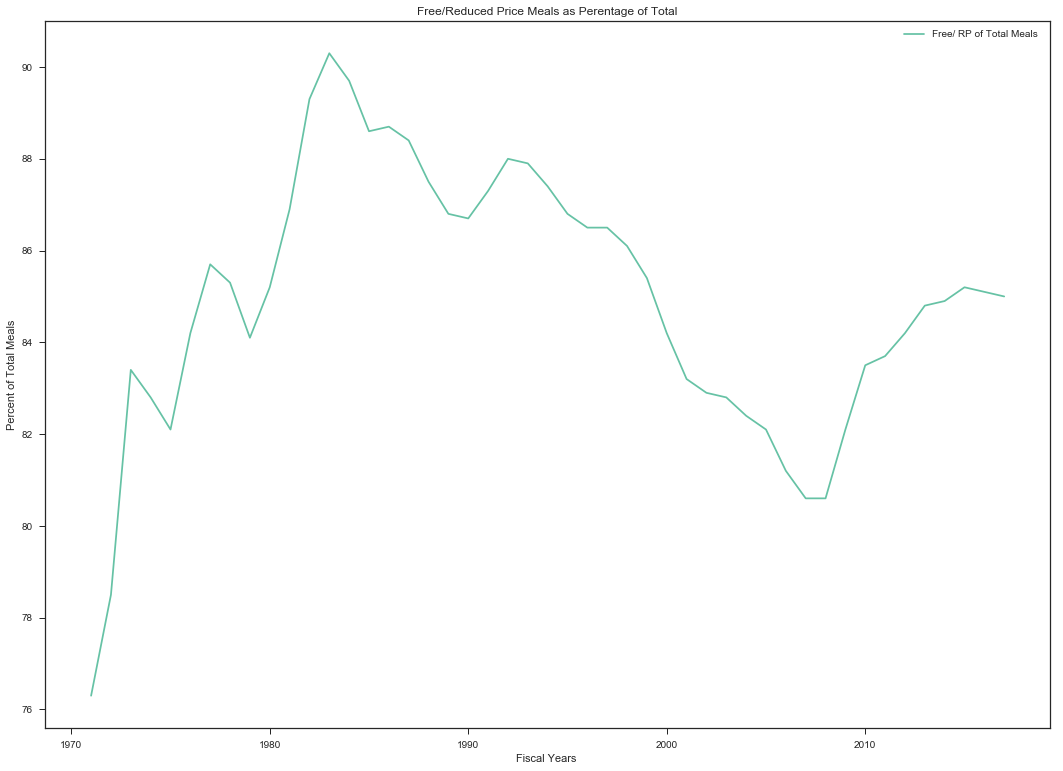

In [373]:
plt.subplots(figsize=(18,13))
ax = plt.gca()
ax.set_ylabel("Percent of Total Meals")
bf_data.plot(kind='line',x='Fiscal Years ',y='Free/ RP of Total Meals ',ax=ax)
plt.title('Free/Reduced Price Meals as Perentage of Total')
plt.show()

There appears to be a large spike in the number of free or reduced price meals as a percentage of total student breakfasts in the early to mid 80's, probably corresponding with the recession. There's a steady decline afterward, and another spike around 2008, likely (again) corresponding with the Great Recession.

Finally, we will load in a text dataset, with a variable denoting the year, and all other variables denoting the historical (pre-2018) and projected (post-2018) probablity for females of that age to die in that given year. This dataset comes from the US Social Security Administration.

In [326]:
fm_data = pd.read_csv("/Users/neil/Desktop/untitled.txt", sep= '\t', lineterminator='\r')
fm_data.columns = ['year', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8', 'age_9', 'age_10', 'age_11', 'age_12', 'age_13', 'age_14', 'age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8', 'age_9', 'age_10', 'age_11', 'age_12', 'age_13', 'age_14', 'age_15', 'age_16', 'age_17', 'age_18', 'age_19', 'age_20', 'age_31', 'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_70', 'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76', 'age_77', 'age_78', 'age_79', 'age_80', 'age_81', 'age_82', 'age_83', 'age_84', 'age_85', 'age_86', 'age_87', 'age_88', 'age_89', 'age_90', 'age_91', 'age_92', 'age_93', 'age_94', 'age_95', 'age_96', 'age_97', 'age_98', 'age_99', 'age_100', 'age_101', 'age_102', 'age_103', 'age_104', 'age_105', 'age_106', 'age_107', 'age_108', 'age_109', 'age_110', 'age_111', 'age_112', 'age_113', 'age_114', 'age_115', 'age_116', 'age_117', 'age_118', 'age_119', 'age_120']
fm_data

,year,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,...,age_111,age_112,age_113,age_114,age_115,age_116,age_117,age_118,age_119,age_120
0,2011,0.005821,0.000374,0.000244,0.000182,0.000136,0.000122,0.000112,0.000104,0.000097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,0.005770,0.000367,0.000239,0.000179,0.000134,0.000120,0.000109,0.000101,0.000094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,0.005720,0.000360,0.000235,0.000176,0.000131,0.000117,0.000106,0.000098,0.000091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,0.005670,0.000354,0.000231,0.000172,0.000129,0.000115,0.000104,0.000096,0.000089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,0.005612,0.000347,0.000226,0.000169,0.000127,0.000112,0.000102,0.000093,0.000086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016,0.005547,0.000341,0.000223,0.000166,0.000125,0.000110,0.000099,0.000091,0.000084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,0.005477,0.000336,0.000219,0.000164,0.000123,0.000108,0.000098,0.000089,0.000082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,0.005404,0.000330,0.000215,0.000161,0.000121,0.000107,0.000096,0.000087,0.000081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019,0.005329,0.000325,0.000212,0.000158,0.000119,0.000105,0.000094,0.000086,0.000079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020,0.005251,0.000320,0.000209,0.000156,0.000117,0.000103,0.000093,0.000085,0.000078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Everything seems pretty straightforward except for the projected death rates for the most elderly, which aren't included. This makes sense, since it is unlikely for there to be sufficient data opn females above 100 in the US to project death rates with any kind of accuracy. One wonders why they included those ages in the first place. 
Consequently, we will drop those variables.

In [328]:
del fm_data['age_111']
del fm_data['age_112']
del fm_data['age_113']
del fm_data['age_114']
del fm_data['age_115']
del fm_data['age_116']
del fm_data['age_117']
del fm_data['age_118']
del fm_data['age_119']
del fm_data['age_120']


In [329]:
fm_data


,year,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,...,age_101,age_102,age_103,age_104,age_105,age_106,age_107,age_108,age_109,age_110
0,2011,0.005821,0.000374,0.000244,0.000182,0.000136,0.000122,0.000112,0.000104,0.000097,...,0.554038,0.587280,0.622517,0.659868,0.699460,0.741427,0.781022,0.820073,0.861077,0.904131
1,2012,0.005770,0.000367,0.000239,0.000179,0.000134,0.000120,0.000109,0.000101,0.000094,...,0.547444,0.580291,0.615108,0.652015,0.691135,0.732604,0.774453,0.813175,0.853834,0.896526
2,2013,0.005720,0.000360,0.000235,0.000176,0.000131,0.000117,0.000106,0.000098,0.000091,...,0.543941,0.576578,0.611173,0.647843,0.686714,0.727916,0.768771,0.807210,0.847570,0.889949
3,2014,0.005670,0.000354,0.000231,0.000172,0.000129,0.000115,0.000104,0.000096,0.000089,...,0.540786,0.573233,0.607627,0.644085,0.682730,0.723694,0.763481,0.801655,0.841738,0.883825
4,2015,0.005612,0.000347,0.000226,0.000169,0.000127,0.000112,0.000102,0.000093,0.000086,...,0.537907,0.570181,0.604392,0.640656,0.679095,0.719841,0.758637,0.796569,0.836398,0.878217
5,2016,0.005547,0.000341,0.000223,0.000166,0.000125,0.000110,0.000099,0.000091,0.000084,...,0.535241,0.567356,0.601397,0.637481,0.675730,0.716274,0.754057,0.791760,0.831348,0.872916
6,2017,0.005477,0.000336,0.000219,0.000164,0.000123,0.000108,0.000098,0.000089,0.000082,...,0.532611,0.564568,0.598442,0.634348,0.672409,0.712754,0.749679,0.787163,0.826521,0.867847
7,2018,0.005404,0.000330,0.000215,0.000161,0.000121,0.000107,0.000096,0.000087,0.000081,...,0.530009,0.561809,0.595518,0.631249,0.669124,0.709271,0.745421,0.782693,0.821827,0.862919
8,2019,0.005329,0.000325,0.000212,0.000158,0.000119,0.000105,0.000094,0.000086,0.000079,...,0.527434,0.559080,0.592625,0.628182,0.665873,0.705826,0.741268,0.778331,0.817248,0.858110
9,2020,0.005251,0.000320,0.000209,0.000156,0.000117,0.000103,0.000093,0.000085,0.000078,...,0.524862,0.556354,0.589735,0.625119,0.662626,0.702066,0.737169,0.774028,0.812729,0.853365


Everything looks good now. Let's make sure we have all of the missing values gone:

In [332]:
fm_data_missing = fm_data[fm_data.isnull().any(axis=1)]
fm_data_missing[:100]

,year,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,...,age_101,age_102,age_103,age_104,age_105,age_106,age_107,age_108,age_109,age_110


No more observations with missing values.
Let's check out the object types of our variables, to make sure they're all numeric:

In [333]:
fm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 121 entries, year to age_110
dtypes: float64(120), int64(1)
memory usage: 75.7 KB


Excellent. The year variable is an integer and the age variables are all floats.
Now let's check for outliers:

In [344]:
q_df = fm_data.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,year,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,...,age_101,age_102,age_103,age_104,age_105,age_106,age_107,age_108,age_109,age_110
0.25,2030.75,0.002296,0.000153,0.000101,0.000075,0.000056,0.000049,0.000044,0.000040,0.000036,...,0.412076,0.436800,0.463009,0.490789,0.516769,0.542607,0.569738,0.598224,0.628135,0.659543
0.75,2070.25,0.004422,0.000272,0.000178,0.000133,0.000099,0.000087,0.000078,0.000071,0.000065,...,0.497352,0.527193,0.558825,0.592354,0.627895,0.662308,0.695424,0.730195,0.766705,0.805040
iqr,39.50,0.002126,0.000119,0.000077,0.000058,0.000043,0.000038,0.000034,0.000031,0.000030,...,0.085276,0.090393,0.095816,0.101565,0.111126,0.119701,0.125687,0.131971,0.138569,0.145497
whisker_length,59.25,0.003189,0.000178,0.000116,0.000087,0.000065,0.000057,0.000051,0.000047,0.000044,...,0.127914,0.135589,0.143724,0.152348,0.166689,0.179552,0.188530,0.197956,0.207854,0.218246
max_whisker,2129.50,0.007611,0.000450,0.000293,0.000219,0.000164,0.000145,0.000130,0.000118,0.000110,...,0.625266,0.662782,0.702548,0.744702,0.794584,0.841860,0.883954,0.928151,0.974558,1.023286
min_whisker,1971.50,-0.000893,-0.000024,-0.000015,-0.000012,-0.000009,-0.000008,-0.000007,-0.000007,-0.000009,...,0.284162,0.301211,0.319285,0.338442,0.350079,0.363055,0.381208,0.400268,0.420282,0.441296


It doesn't look like any of our observations extend beyond the max whiskers for each variable, so we're good to go ahead and start analyszing our data.

In [346]:
fm_data.describe()

,year,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,...,age_101,age_102,age_103,age_104,age_105,age_106,age_107,age_108,age_109,age_110
count,80.0000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,2050.5000,0.003406,0.000217,0.000141,0.000106,0.000079,0.000070,0.000063,0.000057,0.000052,...,0.455820,0.483169,0.512159,0.542796,0.573739,0.604125,0.634615,0.666345,0.699663,0.734646
std,23.2379,0.001268,0.000073,0.000048,0.000036,0.000027,0.000024,0.000021,0.000020,0.000019,...,0.050431,0.053457,0.056665,0.060200,0.065489,0.070943,0.074989,0.078739,0.082675,0.086809
min,2011.0000,0.001658,0.000117,0.000076,0.000057,0.000043,0.000038,0.000034,0.000030,0.000026,...,0.378655,0.401374,0.425456,0.449669,0.472153,0.495760,0.520548,0.546576,0.573904,0.602600
25%,2030.7500,0.002296,0.000153,0.000101,0.000075,0.000056,0.000049,0.000044,0.000040,0.000036,...,0.412076,0.436800,0.463009,0.490789,0.516769,0.542607,0.569738,0.598224,0.628135,0.659543
50%,2050.5000,0.003184,0.000204,0.000133,0.000100,0.000074,0.000066,0.000059,0.000053,0.000048,...,0.451267,0.478343,0.507043,0.537466,0.569141,0.597598,0.627478,0.658852,0.691795,0.726384
75%,2070.2500,0.004422,0.000272,0.000178,0.000133,0.000099,0.000087,0.000078,0.000071,0.000065,...,0.497352,0.527193,0.558825,0.592354,0.627895,0.662308,0.695424,0.730195,0.766705,0.805040
max,2090.0000,0.005821,0.000374,0.000244,0.000182,0.000136,0.000122,0.000112,0.000104,0.000097,...,0.554038,0.587280,0.622517,0.659868,0.699460,0.741427,0.781022,0.820073,0.861077,0.904131


We have 7 years of historical death probabilites, and 83 years of projected death probabilities for females. Appropriately, the averages seem to decreaase initially, and then increase as females age. This is makes a lot of sense; infants and the elderly are more likely to perish due to disease or accident.

Let's verify some of our intuition about death probabilities with the following graphs:

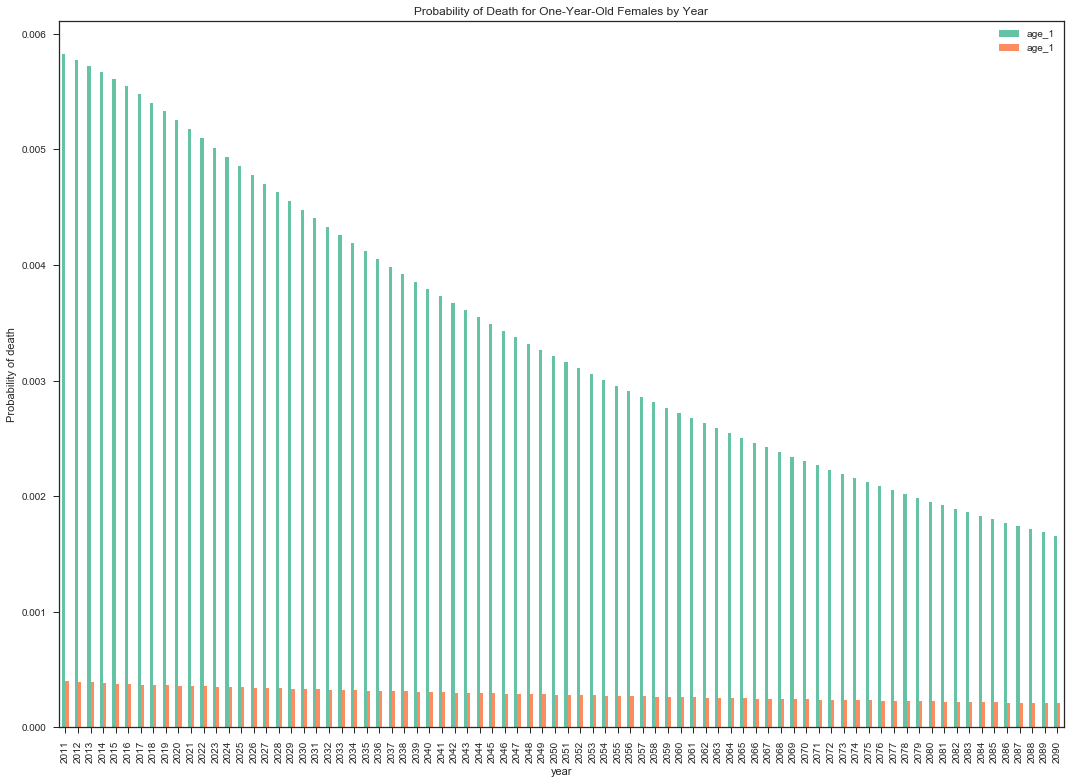

In [374]:
plt.subplots(figsize=(18,13))
ax = plt.gca()
ax.set_ylabel("Probability of death")

fm_data.plot(kind='bar', x= 'year', y='age_1', ax=ax)
plt.title('Probability of Death for One-Year-Old Females by Year')
plt.show()

This graph shows an optimism of fewer infant deaths in the future. Perhaps this optimism comes from a progressing advancement in medical technologies, vaccines, etc.

The same holds true for the elderly:

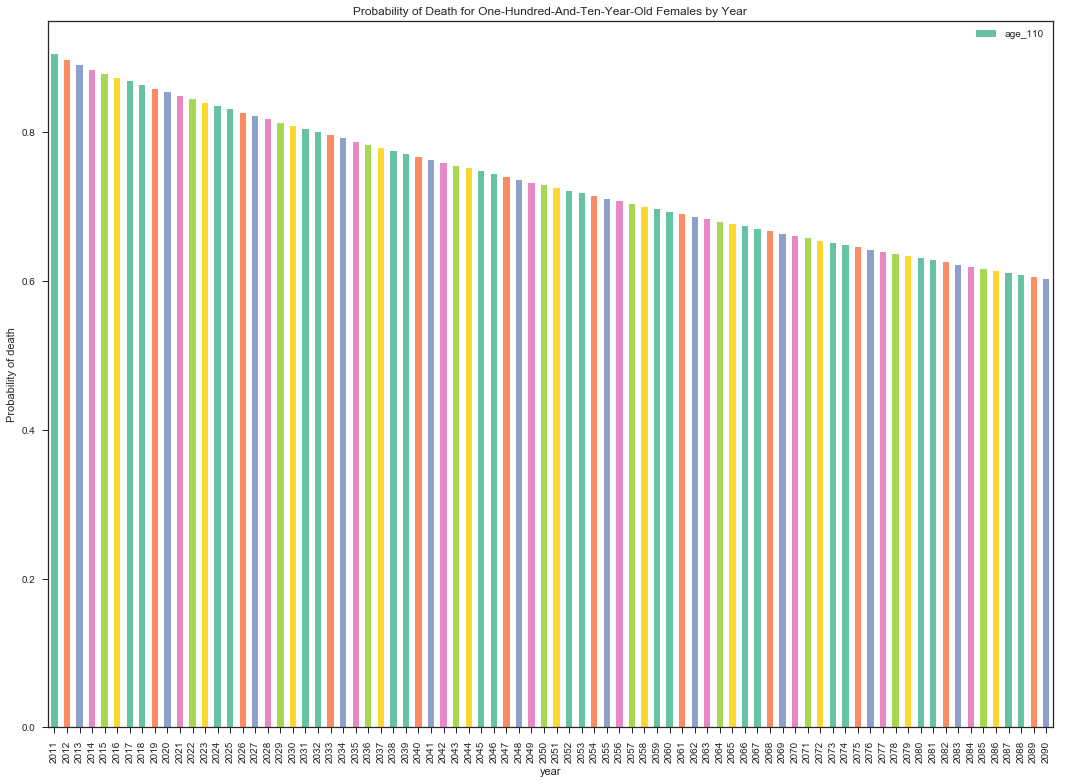

In [376]:
plt.subplots(figsize=(18,13))
ax = plt.gca()
ax.set_ylabel("Probability of death")

fm_data.plot(kind='bar', x= 'year', y='age_110', ax=ax)
plt.title('Probability of Death for One-Hundred-And-Ten-Year-Old Females by Year')
plt.show()

Now let's see if we correctly assumed that the probability of death decreases and then increase again:

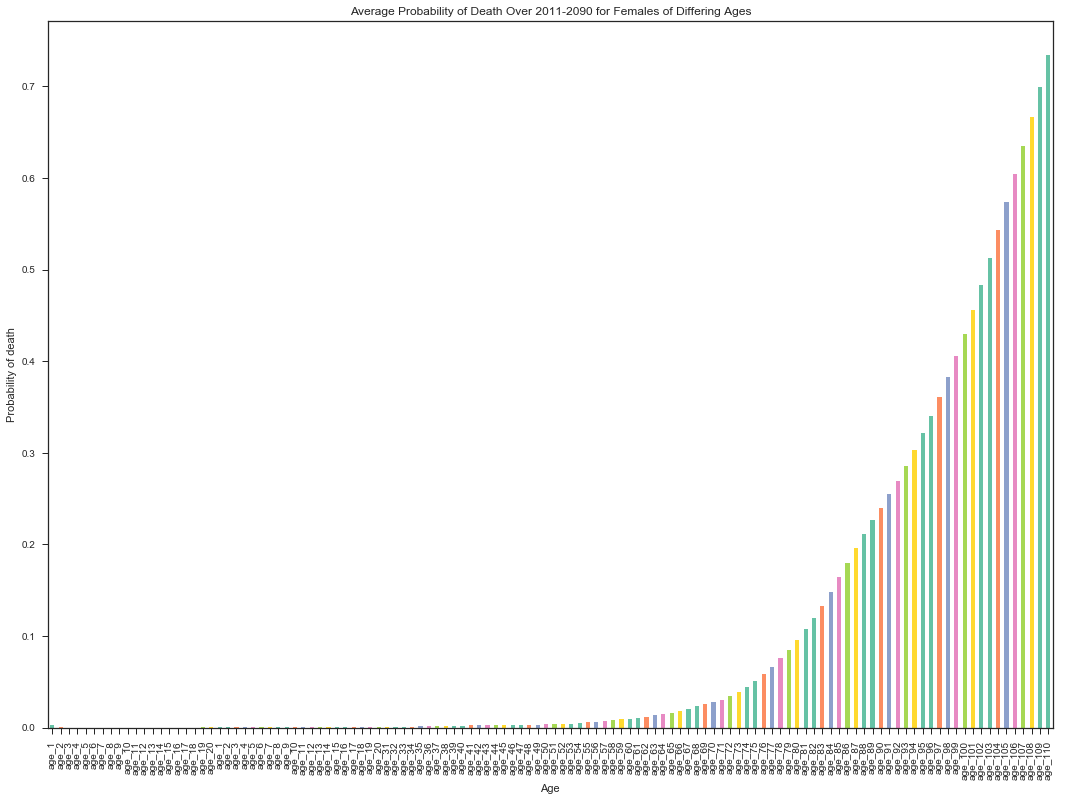

In [389]:
plt.subplots(figsize=(18,13))
ax = plt.gca()
ax.set_ylabel("Probability of death")
ax.set_xlabel("Age")
fm_data.mean().plot(kind = "bar")
plt.title('Average Probability of Death Over 2011-2090 for Females of Differing Ages')
plt.show()

Our intuition was correct; there is a minute decrease of probability of death after age 1, and an exponential increase beginning around age 35. 